# IMPORTING NECESSARY LIBRARIES

In [61]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn.metrics import accuracy_score, classification_report

# IMPORTING DATASET

In [63]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week', 'native-country', 'income']

train = pd.read_csv('adult(data).csv', names = column_names)
test = pd.read_csv('adult(test).csv', names = column_names, skiprows = 1)

df = pd.concat([test,train])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [64]:
columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'income']

for column in columns:
    print(column,':', df[column].unique(), '\n')

workclass : [' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education : [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool'] 

marital-status : [' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse'] 

occupation : [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces'] 

relationship : [' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative'] 

race : [' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo'] 

sex : [' Male' ' Female'] 

native-country : [' United-States'

# DATA STATISTICS 

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [66]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [67]:
df[df == ' ?'] = np.nan
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [68]:
df.workclass.fillna(df.workclass.mode()[0],inplace = True)
df.occupation.fillna(df.occupation.mode()[0],inplace = True)
df["native-country"].fillna(df["native-country"].mode()[0],inplace = True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [69]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [70]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week', 'native-country', 'income']

for column in col_names:
    print(column, '\n',df[column].value_counts(),'\n')

age 
 36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64 

workclass 
  Private             36705
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64 

fnlwgt 
 203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64 

education 
  HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83

In [71]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


# DATA PREPROCESSING

## 'INCOME' COLUMN OPERATION 

In [72]:
df.replace({'income':{' <=50K.': '<=50K', 
                      ' >50K.': '>50K', 
                      ' >50K': '>50K', 
                      ' <=50K': '<=50K'}}, inplace = True)

df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

## DROPPING DUPLICATES

In [73]:
df.drop_duplicates(keep = 'last', inplace = True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# VISUALIZATION

## AGE vs INCOME 

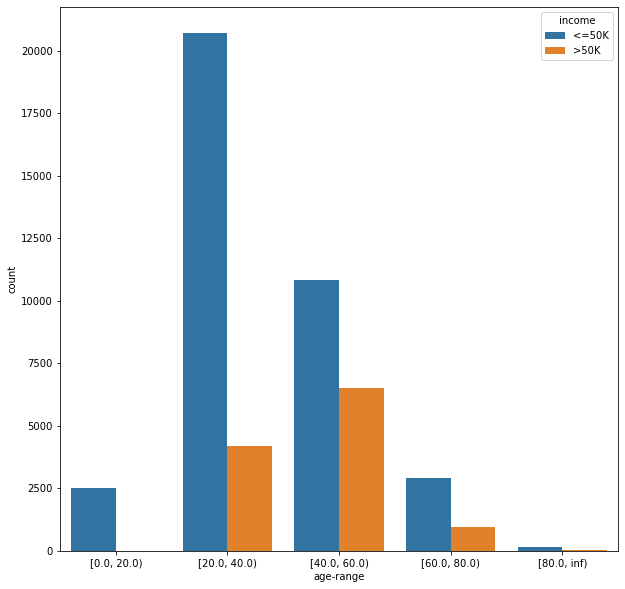

In [74]:
df['age-range'] = pd.cut(df['age'], [0,20,40,60,80, np.inf], right=False)
#df['age-range'].unique()

plt.subplots(figsize=(10,10))
sns.countplot(x='age-range', hue='income', data=df)
plt.show()



* Most people earn >50K between 40-60 years. 
* Most people earn <=50K between 20-40 years.




## GENDER vs INCOME

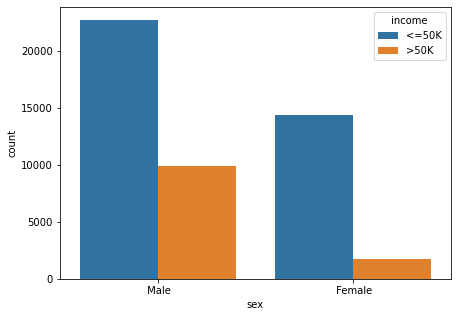

In [75]:
plt.subplots(figsize=(7,5))
sns.countplot(x='sex', hue='income',  data=df)
plt.show()



*   Males have a higher count of earning >50K as compared to females.



## WORKCLASS vs INCOME

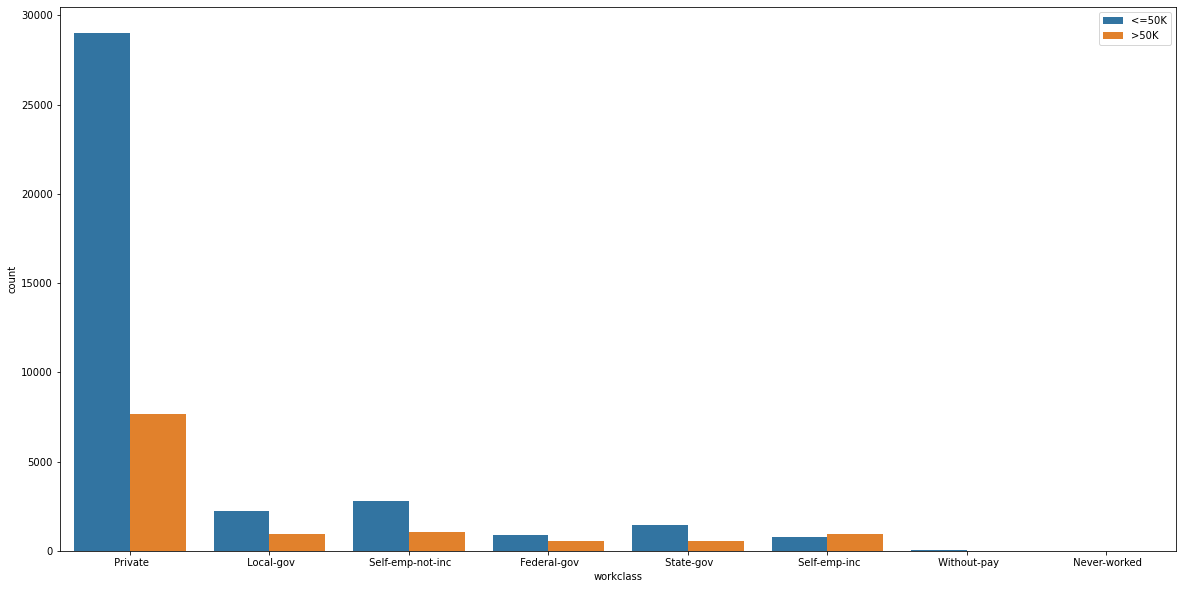

In [76]:
plt.subplots(figsize=(20,10))
sns.countplot(x='workclass', hue='income',  data=df)
plt.legend(loc='upper right')
plt.show()



*   People under the category of Private workclass earns <=50K the most.
*   People under the category of Fedral-gov have fair share in earning >50K and <=50K.


*   The count of people is more for >50K than <=50K in Self-emp-inc workclass.






## EDUCATION vs INCOME

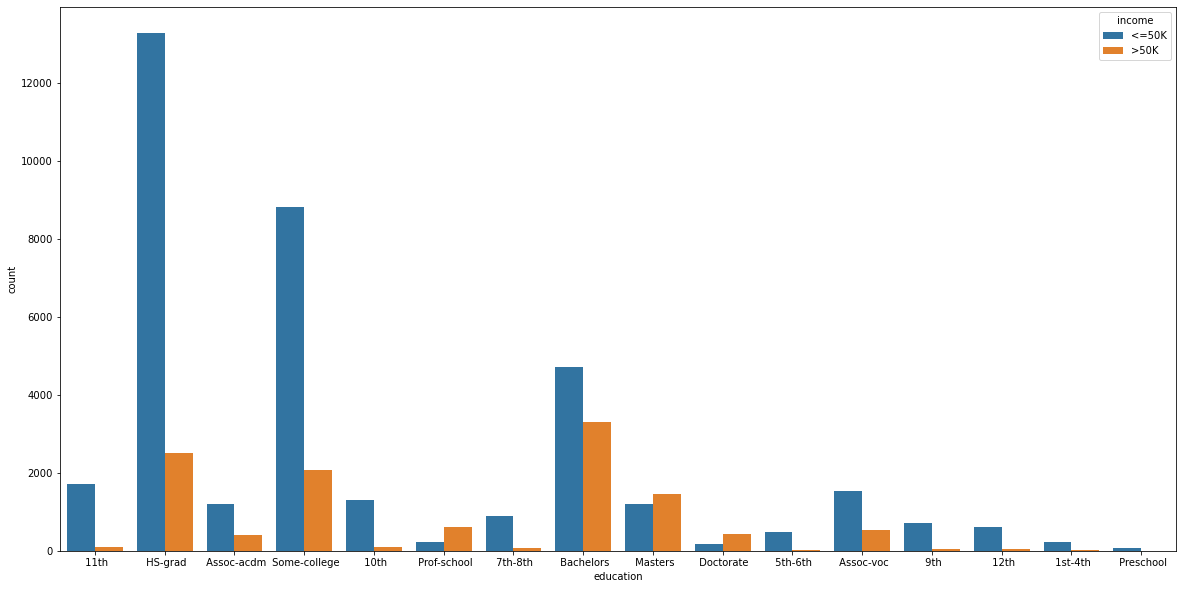

In [77]:
plt.subplots(figsize=(20,10))
sns.countplot(x='education', hue='income',  data=df)
plt.show()



*   It shows that as the education level increases, the proportion of people who earn >50k a year also increases.




## EDUCATION-NUM vs INCOME

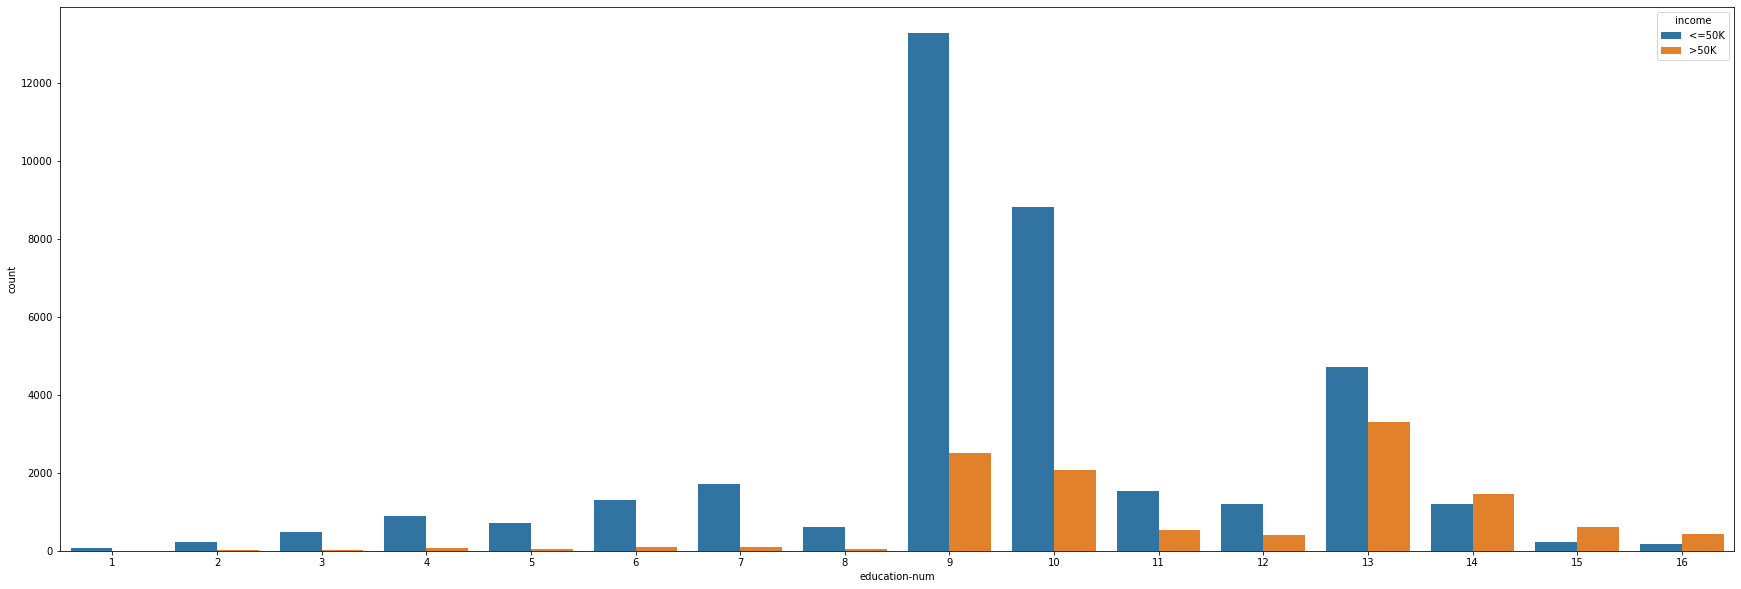

In [78]:
plt.subplots(figsize=(30,10))
sns.countplot(x='education-num', hue='income',  data=df)
plt.show()



*   It shows that after education-num crosses 13, the count of people earning >50K increases.
*   It can be also seen that either column, education or education-num can be dropped, as both share the same data.



## OCCUPATION vs INCOME

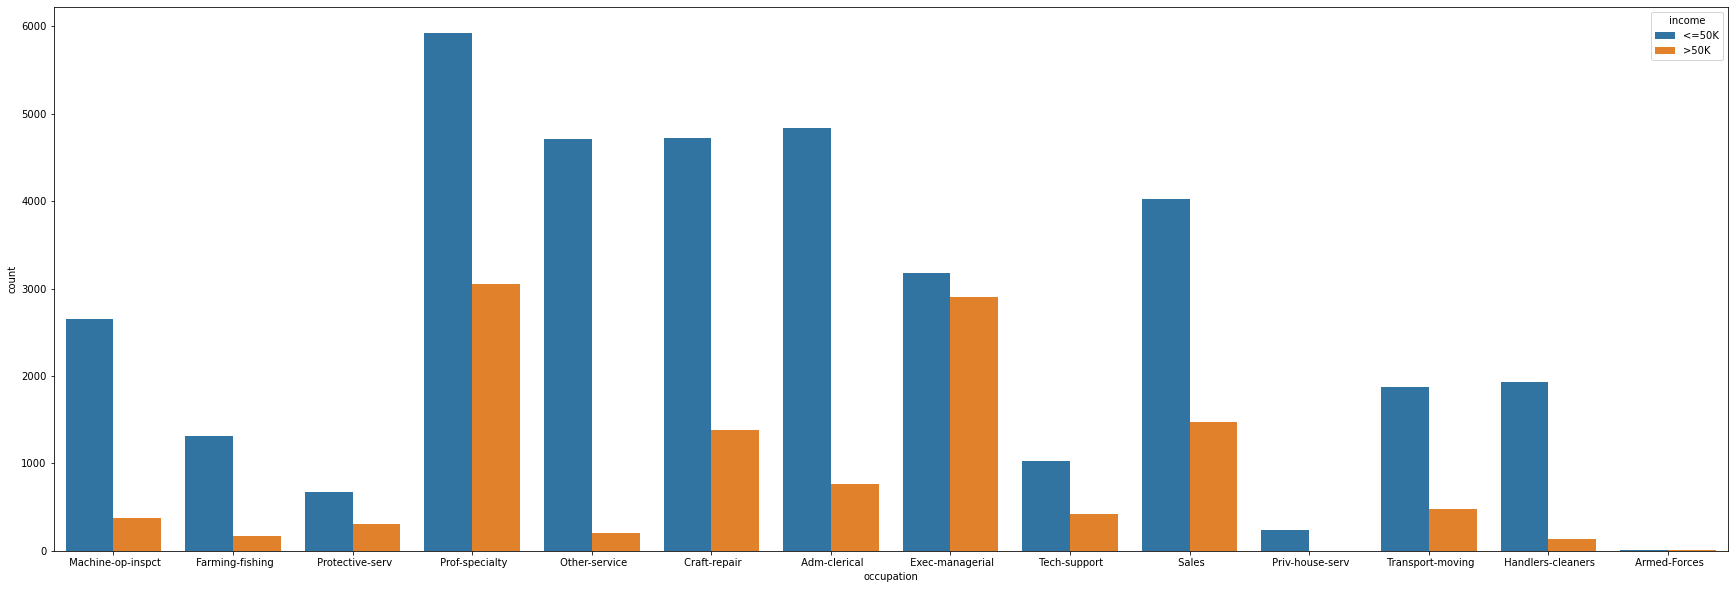

In [79]:
plt.subplots(figsize=(30,10))
sns.countplot(x='occupation', hue='income',  data=df)
plt.show()



*   People under Exec-managerial occupation have high proportion in earninng >50K.


*   The count of people earning >50K is somewhat similar for Prof-speciality and Exec-managerial occupation.





## RACE vs INCOME

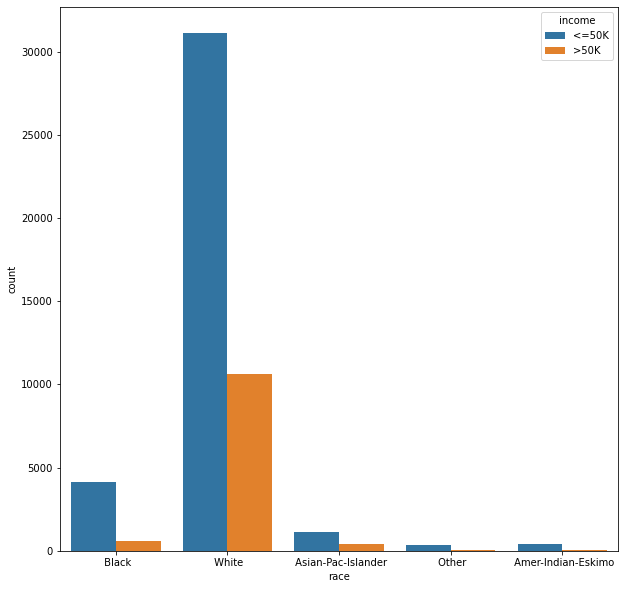

In [80]:
plt.subplots(figsize=(10,10))
sns.countplot(x='race', hue='income',  data=df)
plt.show()



*   Most people earning <=50K are of white race.
*   Also most people earning >50K are of white race.




## RELATIONSHIP vs INCOME

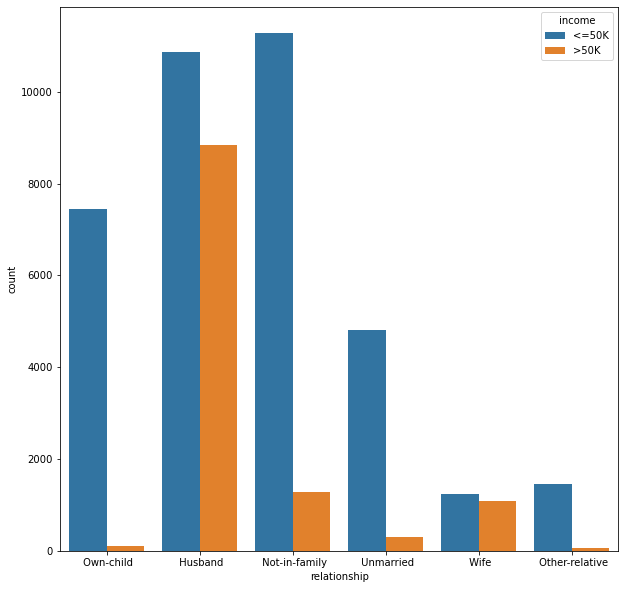

In [81]:
plt.subplots(figsize=(10,10))
sns.countplot(x='relationship', hue='income', data=df)
plt.show()



*   The count of people is the most for earning >50K, when they are either Husband or Wife. 




## MARITAL-STATUS vs INCOME

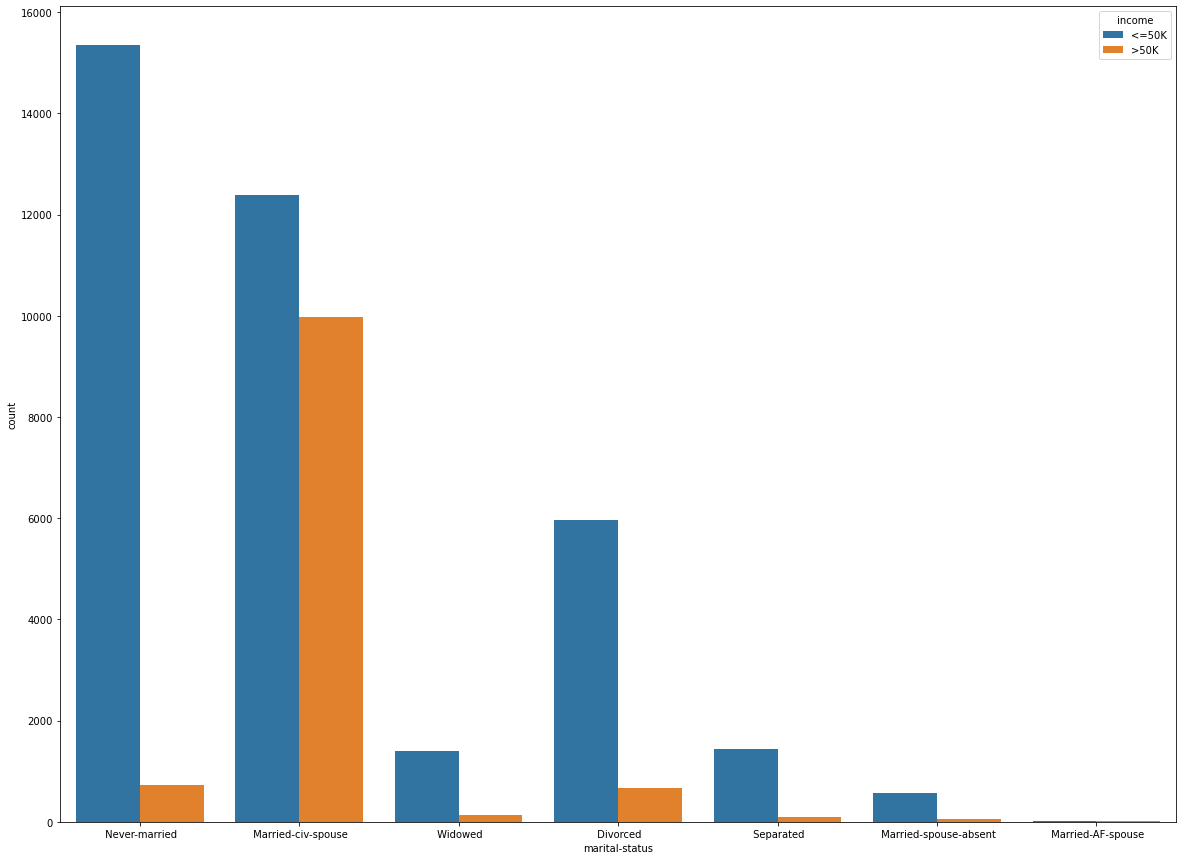

In [82]:
plt.subplots(figsize=(20,15))
sns.countplot(x='marital-status', hue='income', data=df)
plt.show()



*   The proportion of earning >50K is higher for Married-civ-spouse marital-status, than other marital-statuses.


## HOURS-PER-WEEK vs INCOME

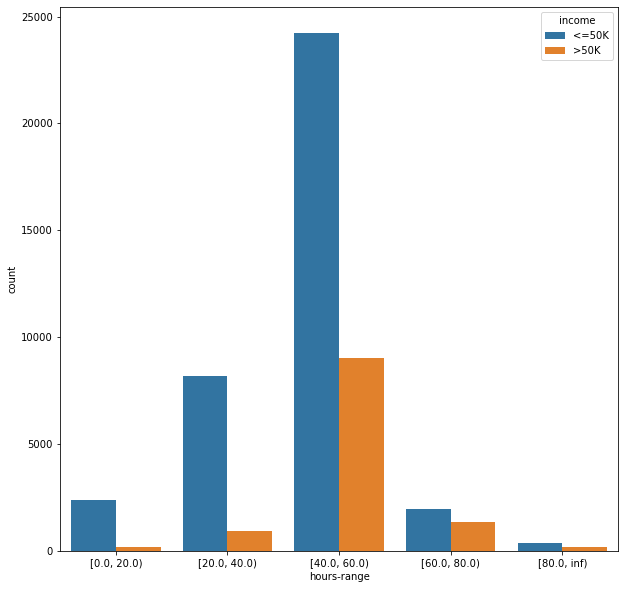

In [83]:
df['hours-range'] = pd.cut(df['hours-per-week'], [0,20,40,60,80, np.inf], right=False)
#df['hours-range'].unique()

plt.subplots(figsize=(10,10))
sns.countplot(x='hours-range', hue='income', data=df)
plt.show()



*   The count of people for earning >50K and <=50K, is the most when they work for [40,60) hours per week.
*   The rate of earning >50K significantly increases if a person works for more than 60 hours per week.



## NATIVE-COUNTRY vs INCOME

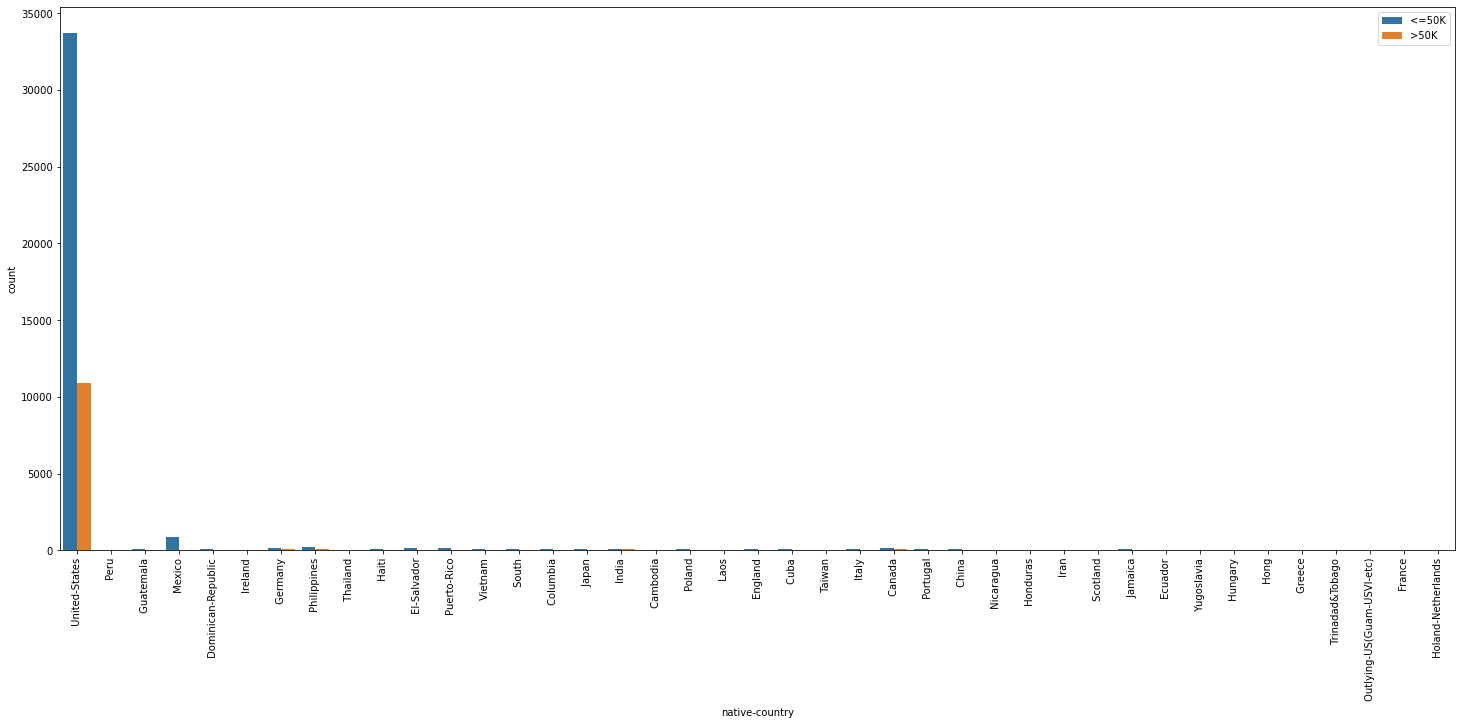

In [84]:
plt.subplots(figsize=(25,10))
sns.countplot(x='native-country', hue='income', data=df)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [85]:
country = df["native-country"].unique()
country = country[country != "?"]
coulist=[]
for i in country:
    i = i.strip()
    i = i.replace("-"," ")
    coulist.append(i)
coulist
def do_fuzzy_search(country):
    ukcount = {"England":"GBR","Scotland":"GBR","Laos":"LAO","Holand Netherlands":"NLO","Trinadad&Tobago":"TTO"}
    try:
        result = pycountry.countries.search_fuzzy(country)
    except Exception:
        if country in ukcount.keys():
            return ukcount[country]
        return np.nan
    else:
        return result[0].alpha_3
ISO = list(map(do_fuzzy_search,coulist))
dict1 = dict(zip(ISO,coulist))
df.replace(to_replace = country,value = ISO,inplace = True)

In [86]:
ages = df.age.unique()
newdata ={"iso":[],"age":[]," >50 ":[]," <=50 ":[]}
for coun in ISO:
    for age in ages: 
        data3 = df[(df["native-country"] == coun )& (df["age"] == age)]
        newdata["iso"].append(coun)
        newdata["age"].append(age)
        newdata[" >50 "].append(len(data3[data3["income"] == ">50K"]))
        newdata[" <=50 "].append(len(data3[data3["income"] == "<=50K"]))
newDF = pd.DataFrame(newdata)
newDF.head(100)
newDF.dropna(inplace = True)
newDF.sort_values("age",inplace = True)
newDF

,iso,age,>50,<=50
1359,POL,17,0,2
1137,JPN,17,0,0
2617,HKG,17,0,0
1211,IND,17,0,1
2543,HUN,17,0,0
...,...,...,...,...
1689,TWN,90,0,0
505,DEU,90,0,0
2355,JAM,90,0,0
1097,CAN,90,0,0


In [87]:
fig = px.choropleth(newDF, locations="iso",
                    color=" >50 ",
                    hover_name="iso",
                    hover_data = [" >50 "," <=50 "],
                    animation_frame="age",
                    #animation_group = "income",
                    color_continuous_scale=px.colors.sequential.PuRd)
#fig["layout"].pop("updatemenus")
fig.update_layout(margin={'r' :0, 't' :4, 'l':0, 'b':4})
fig.show()

## HEATMAP

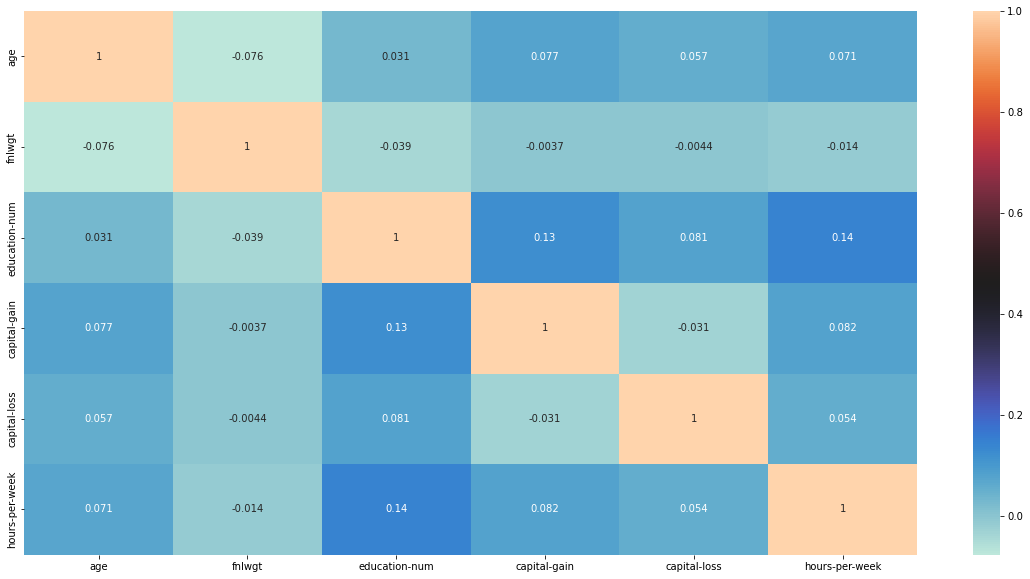

In [90]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True, cmap="icefire")
plt.show()
plt.close()

# LABEL ENCODING

In [29]:
label_encoder = preprocessing.LabelEncoder()

df.drop(['hours-range', 'age-range'], axis=1, inplace = True)

columns = ['workclass', 'fnlwgt', 'education', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'native-country']

for column in columns:
    df[column]= label_encoder.fit_transform(df[column])
    
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,19329,1,7,4,6,3,2,1,0,0,40,35,<=50K
1,38,3,4212,11,9,2,4,0,4,1,0,0,50,35,<=50K
2,28,1,25340,7,12,2,10,0,4,1,0,0,40,35,>50K
3,44,3,11201,15,10,2,6,0,2,1,7688,0,40,35,>50K
4,18,3,5411,15,10,4,9,3,4,0,0,0,30,35,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,21582,7,12,2,12,5,4,0,0,0,38,35,<=50K
32557,40,3,10584,11,9,2,6,0,4,1,0,0,40,35,>50K
32558,58,3,10316,11,9,6,0,4,4,0,0,0,40,35,<=50K
32559,22,3,16813,11,9,4,0,3,4,1,0,0,20,35,<=50K


# FEATURE SELECTION

In [30]:
scaler = StandardScaler()
features = df.drop(['income', 'fnlwgt', 'education'],axis = 1)
target = df['income']
scaled_data = scaler.fit_transform(features)
stand_data = scaled_data

# OVERSAMPLING OF DATA

In [31]:
smote = SMOTE(sampling_strategy= 0.7,random_state = 22)

x_smote, y_smote = smote.fit_resample(stand_data,target)

print('Original dataset shape', Counter(target))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({'<=50K': 37108, '>50K': 11681})
Resample dataset shape Counter({'<=50K': 37108, '>50K': 25975})


# TRAIN-TEST SPLIT

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 22)
#training_features, test_features, training_target, test_target = train_test_split(scaled_data, target, test_size = 0.2, random_state = 42)

# MODEL BUILDING

In [33]:
def evaluate(actual, pred):
    
    confusion_matrix = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion_matrix.loc['>50K','>50K']
    TN = confusion_matrix.loc['<=50K','<=50K']
    FP = confusion_matrix.loc['<=50K','>50K']
    FN = confusion_matrix.loc['>50K','<=50K']

    accuracy = (TP+TN)/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    error_rate = 1 - accuracy
    
    model_dict = {}
    model_dict['accuracy'] =  accuracy
    model_dict['precision'] = precision
    model_dict['recall'] = recall
    model_dict['f_measure'] = f_measure
    model_dict['error_rate'] = error_rate
    
    return model_dict

## DECISION TREE

### Gini

In [34]:
dt_gini_model = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=22)
dt_gini_model.fit(x_train, y_train)

dt_gini_train_pred = dt_gini_model.predict(x_train)
dt_gini_test_pred = dt_gini_model.predict(x_test)

print(f'Train score: {accuracy_score(y_train, dt_gini_train_pred) *100:.2f}%')
print(f'Test score: {accuracy_score(y_test, dt_gini_test_pred) *100:.2f}%')

dt_gini_eval = evaluate(y_test, dt_gini_test_pred)
dt_gini_df = round(pd.DataFrame([dt_gini_eval], index = ['Decision Tree(Gini)']),4)
display(dt_gini_df)

Train score: 81.00%
Test score: 80.79%


,accuracy,precision,recall,f_measure,error_rate
Decision Tree(Gini),0.8079,0.7854,0.7331,0.7583,0.1921


In [35]:
print(classification_report(y_test, dt_gini_test_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.86      0.84     11144
        >50K       0.79      0.73      0.76      7781

    accuracy                           0.81     18925
   macro avg       0.80      0.80      0.80     18925
weighted avg       0.81      0.81      0.81     18925



### Entropy

In [36]:
dt_entropy_model = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=22)
dt_entropy_model.fit(x_train, y_train)

dt_entropy_train_pred = dt_entropy_model.predict(x_train)
dt_entropy_test_pred = dt_entropy_model.predict(x_test)

print(f'Train score: {accuracy_score(y_train, dt_entropy_train_pred) *100:.2f}%')
print(f'Test score: {accuracy_score(y_test, dt_entropy_test_pred) *100:.2f}%')

dt_entropy_eval = evaluate(y_test, dt_entropy_test_pred)
dt_entropy_df = round(pd.DataFrame([dt_entropy_eval], index = ['Decision Tree(Entropy)']),4)
display(dt_entropy_df)

Train score: 80.71%
Test score: 80.26%


,accuracy,precision,recall,f_measure,error_rate
Decision Tree(Entropy),0.8026,0.7262,0.8346,0.7766,0.1974


In [37]:
print(classification_report(y_test, dt_entropy_test_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.78      0.82     11144
        >50K       0.73      0.83      0.78      7781

    accuracy                           0.80     18925
   macro avg       0.80      0.81      0.80     18925
weighted avg       0.81      0.80      0.80     18925



## RANDOM FOREST

### Gini

In [38]:
clf = RandomForestClassifier(criterion='gini',n_estimators = 200, max_depth=6, random_state = 22)
clf.fit(x_train, y_train)

rf_gini_train_pred = clf.predict(x_train)
rf_gini_test_pred = clf.predict(x_test)

print(f'Train score: {accuracy_score(y_train, rf_gini_train_pred)*100:.2f}%')
print(f'Test score: {accuracy_score(y_test, rf_gini_test_pred)*100:.2f}%')

rf_gini_eval = evaluate(y_test, rf_gini_test_pred)
rf_gini_df = round(pd.DataFrame([rf_gini_eval], index = ['Random Forest(Gini)']),4)
display(rf_gini_df)

Train score: 82.93%
Test score: 82.71%


,accuracy,precision,recall,f_measure,error_rate
Random Forest(Gini),0.8271,0.7768,0.8131,0.7945,0.1729


In [39]:
print(classification_report(y_test, rf_gini_test_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.84      0.85     11144
        >50K       0.78      0.81      0.79      7781

    accuracy                           0.83     18925
   macro avg       0.82      0.82      0.82     18925
weighted avg       0.83      0.83      0.83     18925



### Entropy

In [40]:
clf = RandomForestClassifier(criterion='entropy',n_estimators = 200, max_depth=6, random_state = 22)
clf.fit(x_train, y_train)

rf_entropy_train_pred = clf.predict(x_train)
rf_entropy_test_pred = clf.predict(x_test)

print(f'Train score: {accuracy_score(y_train, rf_entropy_train_pred)*100:.2f}%')
print(f'Test score: {accuracy_score(y_test, rf_entropy_test_pred)*100:.2f}%')

rf_entropy_eval = evaluate(y_test, rf_entropy_test_pred)
rf_entropy_df = round(pd.DataFrame([rf_entropy_eval], index = ['Random Forest(Entropy)']),4)
display(rf_entropy_df)

Train score: 82.59%
Test score: 82.30%


,accuracy,precision,recall,f_measure,error_rate
Random Forest(Entropy),0.823,0.7733,0.8057,0.7891,0.177


In [41]:
print(classification_report(y_test, rf_entropy_test_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.84      0.85     11144
        >50K       0.77      0.81      0.79      7781

    accuracy                           0.82     18925
   macro avg       0.82      0.82      0.82     18925
weighted avg       0.82      0.82      0.82     18925



## SUPPORT VECTOR MACHINE

In [42]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(x_train, y_train)

svm_train_pred = svm_model.predict(x_train)
svm_test_pred = svm_model.predict(x_test)

print(f'Train score: {accuracy_score(y_train, svm_train_pred)*100:.2f}%')
print(f'Test score: {accuracy_score(y_test, svm_test_pred)*100:.2f}%')

svm_eval = evaluate(y_test, svm_test_pred)
svm_df = round(pd.DataFrame([svm_eval], index = ['SVM']),4)
display(svm_df)

Train score: 77.12%
Test score: 77.37%


,accuracy,precision,recall,f_measure,error_rate
SVM,0.7737,0.7547,0.6662,0.7077,0.2263


In [43]:
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

       <=50K       0.78      0.85      0.82     11144
        >50K       0.75      0.67      0.71      7781

    accuracy                           0.77     18925
   macro avg       0.77      0.76      0.76     18925
weighted avg       0.77      0.77      0.77     18925



## LOGISTIC REGRESSION

### Multinomial

In [44]:
lr = LogisticRegression(multi_class = 'multinomial', max_iter = 200)
lr.fit(x_train, y_train)

lr_multin_train_pred = lr.predict(x_train)
lr_multin_test_pred = lr.predict(x_test)

print(f'Train score: {accuracy_score(y_train, lr_multin_train_pred)*100:.2f}%')
print(f'Test score: {accuracy_score(y_test, lr_multin_test_pred)*100:.2f}%')

lr_multin_eval = evaluate(y_test, lr_multin_test_pred)
lr_multin_df = round(pd.DataFrame([lr_multin_eval], index = ['Logistic Regression(multinomial)']),4)
display(lr_multin_df)

Train score: 76.97%
Test score: 77.12%


,accuracy,precision,recall,f_measure,error_rate
Logistic Regression(multinomial),0.7712,0.747,0.6706,0.7068,0.2288


In [45]:
print(classification_report(y_test,lr_multin_test_pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.84      0.81     11144
        >50K       0.75      0.67      0.71      7781

    accuracy                           0.77     18925
   macro avg       0.77      0.76      0.76     18925
weighted avg       0.77      0.77      0.77     18925



### ovr

In [46]:
lr = LogisticRegression(multi_class = 'ovr', max_iter = 200)
lr.fit(x_train, y_train)

lr_ovr_train_pred = lr.predict(x_train)
lr_ovr_test_pred = lr.predict(x_test)

print(f'Train score: {accuracy_score(y_train, lr_ovr_train_pred)*100:.2f}%')
print(f'Test score: {accuracy_score(y_test, lr_ovr_test_pred)*100:.2f}%')

lr_ovr_eval = evaluate(y_test, lr_ovr_test_pred)
lr_ovr_df = round(pd.DataFrame([lr_ovr_eval], index = ['Logistic Regression(ovr)']),4)
display(lr_ovr_df)

Train score: 76.97%
Test score: 77.11%


,accuracy,precision,recall,f_measure,error_rate
Logistic Regression(ovr),0.7711,0.7469,0.6706,0.7067,0.2289


In [47]:
print(classification_report(y_test,lr_ovr_test_pred))

              precision    recall  f1-score   support

       <=50K       0.79      0.84      0.81     11144
        >50K       0.75      0.67      0.71      7781

    accuracy                           0.77     18925
   macro avg       0.77      0.76      0.76     18925
weighted avg       0.77      0.77      0.77     18925



## k NEAREST NEIGHBOUR

In [48]:
k_range = range(2, 11)
knn_output = []

for val in k_range:
    knn = KNeighborsClassifier(n_neighbors=val, metric = 'euclidean')
    knn.fit(x_train, y_train)
    knn_train_pred = knn.predict(x_train)
    knn_test_pred = knn.predict(x_test)
    knn_eval = evaluate(y_test, knn_test_pred)
    knn_eval['k'] = val
    knn_eval['Train score(%)'] = accuracy_score(y_train, knn_train_pred)*100
    knn_eval['Test score(%)'] = accuracy_score(y_test, knn_test_pred)*100
    knn_output.append(knn_eval)
    
knn_df = round(pd.DataFrame(knn_output),4)
knn_df.set_index('k', inplace = True)
display(knn_df)

,accuracy,precision,recall,f_measure,error_rate,Train score(%),Test score(%)
k,,,,,,,
2,0.8278,0.8405,0.7173,0.7740,0.1722,92.8846,82.7794
3,0.8383,0.7770,0.8508,0.8122,0.1617,90.9960,83.8256
4,0.8335,0.8121,0.7742,0.7927,0.1665,89.4651,83.3501
5,0.8357,0.7730,0.8501,0.8097,0.1643,88.4619,83.5720
6,0.8378,0.8026,0.8030,0.8028,0.1622,87.8255,83.7781
7,0.8343,0.7707,0.8499,0.8084,0.1657,87.0284,83.4346
8,0.8327,0.7900,0.8076,0.7987,0.1673,86.6932,83.2655
9,0.8316,0.7673,0.8474,0.8054,0.1684,86.0886,83.1598
10,0.8303,0.7845,0.8098,0.7969,0.1697,85.8010,83.0330


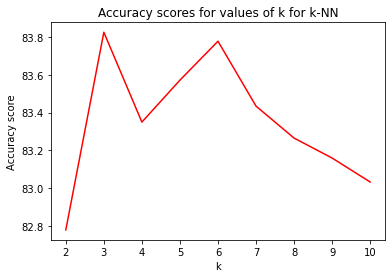

In [49]:
test_score = knn_df['Test score(%)']
sns.lineplot(x = k_range, y = test_score, color = 'red')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.title('Accuracy scores for values of k for k-NN')
plt.show()

When k = 3, it gives the best accuracy.

Taking k = 3,

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean') 
knn_model.fit(x_train, y_train)

x_train_pred = knn_model.predict(x_train)
x_test_pred = knn_model.predict(x_test)

print(f'Train score: {accuracy_score(y_train, x_train_pred)*100:.2f}%')
print(f'Test score: {accuracy_score(y_test, x_test_pred)*100:.2f}%')

knn_eval = evaluate(y_test, knn_test_pred)
knn_df = round(pd.DataFrame([knn_eval], index = ['k Nearest Neighbour']),4)
display(knn_df)

Train score: 91.00%
Test score: 83.83%


,accuracy,precision,recall,f_measure,error_rate
k Nearest Neighbour,0.8303,0.7845,0.8098,0.7969,0.1697


# ANALYSIS

In [51]:
analysis_df = pd.concat([dt_gini_df, dt_entropy_df, rf_gini_df, rf_entropy_df, svm_df, lr_multin_df, lr_ovr_df, knn_df ])
analysis_df

,accuracy,precision,recall,f_measure,error_rate
Decision Tree(Gini),0.8079,0.7854,0.7331,0.7583,0.1921
Decision Tree(Entropy),0.8026,0.7262,0.8346,0.7766,0.1974
Random Forest(Gini),0.8271,0.7768,0.8131,0.7945,0.1729
Random Forest(Entropy),0.8230,0.7733,0.8057,0.7891,0.1770
SVM,0.7737,0.7547,0.6662,0.7077,0.2263
Logistic Regression(multinomial),0.7712,0.7470,0.6706,0.7068,0.2288
Logistic Regression(ovr),0.7711,0.7469,0.6706,0.7067,0.2289
k Nearest Neighbour,0.8303,0.7845,0.8098,0.7969,0.1697


On sorting on the basis of accuracy and f_measure:

In [52]:
analysis_df.sort_values(by = ['f_measure', 'accuracy'], ascending = False, inplace = True)
analysis_df

,accuracy,precision,recall,f_measure,error_rate
k Nearest Neighbour,0.8303,0.7845,0.8098,0.7969,0.1697
Random Forest(Gini),0.8271,0.7768,0.8131,0.7945,0.1729
Random Forest(Entropy),0.8230,0.7733,0.8057,0.7891,0.1770
Decision Tree(Entropy),0.8026,0.7262,0.8346,0.7766,0.1974
Decision Tree(Gini),0.8079,0.7854,0.7331,0.7583,0.1921
SVM,0.7737,0.7547,0.6662,0.7077,0.2263
Logistic Regression(multinomial),0.7712,0.7470,0.6706,0.7068,0.2288
Logistic Regression(ovr),0.7711,0.7469,0.6706,0.7067,0.2289


## PCA

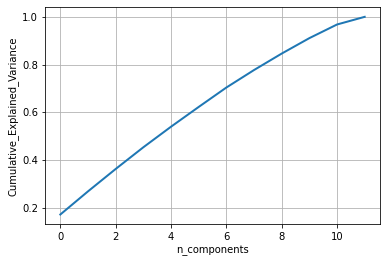

In [53]:
pca = decomposition.PCA()
pca.n_components = 12
pca_data = pca.fit_transform(stand_data)
per_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(per_var_explained)
plt.figure(1,figsize =(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_Explained_Variance')
plt.show()

### Applying Decision Tree after PCA

In [54]:
pca.n_components = 12
pca_data = pca.fit_transform(stand_data)
pca_data.shape

(48789, 12)

#### Train-Test Split

In [55]:
x_trainp, x_testp, y_trainp, y_testp = train_test_split(pca_data, target, test_size = 0.2, random_state = 22)

#### Decision Tree (Gini)

In [56]:
dt_gini_pca_model = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=22)
dt_gini_pca_model.fit(x_trainp, y_trainp)

dt_gini_train_predp = dt_gini_pca_model.predict(x_trainp)
dt_gini_test_predp = dt_gini_pca_model.predict(x_testp)

print(f'Train score: {accuracy_score(y_trainp, dt_gini_train_predp) *100:.2f}%')
print(f'Test score: {accuracy_score(y_testp, dt_gini_test_predp) *100:.2f}%')

dt_gini_pca_eval = evaluate(y_testp, dt_gini_test_predp)
dt_gini_pca_df = round(pd.DataFrame([dt_gini_pca_eval], index = ['Decision Tree(Gini)']),4)
display(dt_gini_pca_df)

Train score: 82.80%
Test score: 82.20%


,accuracy,precision,recall,f_measure,error_rate
Decision Tree(Gini),0.822,0.748,0.4256,0.5425,0.178


In [57]:
print(classification_report(y_test, dt_gini_test_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.86      0.84     11144
        >50K       0.79      0.73      0.76      7781

    accuracy                           0.81     18925
   macro avg       0.80      0.80      0.80     18925
weighted avg       0.81      0.81      0.81     18925



### KNN after PCA

In [58]:
knn_modelp = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean') 
knn_modelp.fit(x_trainp, y_trainp)

x_train_predp = knn_modelp.predict(x_trainp)
x_test_predp = knn_modelp.predict(x_testp)

print(f'Train score: {accuracy_score(y_trainp, x_train_predp)*100:.2f}%')
print(f'Test score: {accuracy_score(y_testp, x_test_predp)*100:.2f}%')

knn_eval = evaluate(y_testp, x_test_predp)
knn_df = round(pd.DataFrame([knn_eval], index = ['k Nearest Neighbour']),4)
display(knn_df)
print(classification_report(y_testp,x_test_predp))

Train score: 89.87%
Test score: 82.77%


,accuracy,precision,recall,f_measure,error_rate
k Nearest Neighbour,0.8277,0.6716,0.5975,0.6324,0.1723


              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7338
        >50K       0.67      0.60      0.63      2420

    accuracy                           0.83      9758
   macro avg       0.77      0.75      0.76      9758
weighted avg       0.82      0.83      0.82      9758

